 # Titanic : Machine learning from Disaster

##### start here: Predict survival on the Titanic and get familiar with ML basics

In [1]:
import numpy as np
import pandas as pd

train_data=pd.read_csv("Datasets/train.csv")
test=pd.read_csv("Datasets/test.csv")

In [2]:
train=train_data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## All null values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Filling null values in Training dataset

In [8]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Cabin'].fillna(train['Cabin'].mode().values[0],inplace=True)
train['Embarked'].fillna(train['Embarked'].mode().values[0],inplace=True)


In [9]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Filling null values for Test datasets

In [10]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test['Cabin'].fillna(test['Cabin'].mode().values[0],inplace=True)


In [13]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Now Feature selection

In [14]:

## train dataset
train=train.drop(columns=['Name'],axis=1)
train=train.drop(columns=['Ticket'])
train=train.drop(columns=['Cabin'])

## test datasets
test=test.drop(columns=['Name'])
test=test.drop(columns=['Ticket'])
test=test.drop(columns=['Cabin'])



In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## Now LabelEncoding

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

## train data
train['Sex']=encoder.fit_transform(train['Sex'])
train['Embarked']=encoder.fit_transform(train['Embarked'])

## test data
test['Sex']=encoder.fit_transform(test['Sex'])
test['Embarked']=encoder.fit_transform(test['Embarked'])


In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [19]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


# Data Visualization

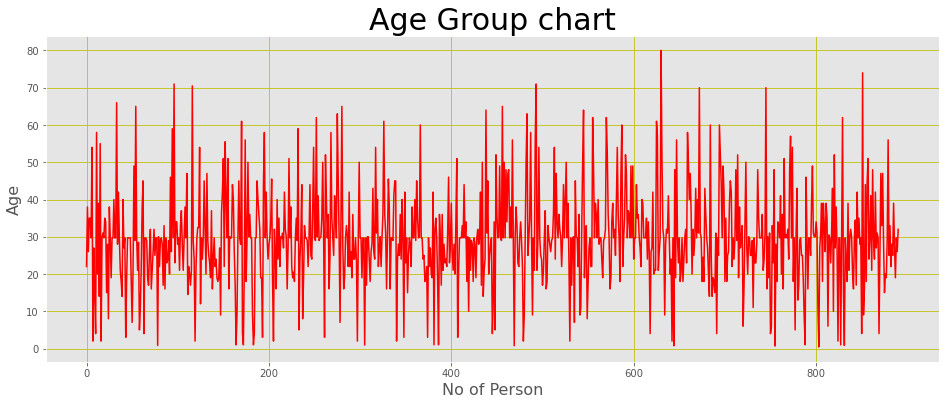

In [21]:
import matplotlib.pyplot as plt
from matplotlib import style

plt.figure(figsize=(16,6))
style.use("ggplot")
plt.plot(train['Age'],color='r')
plt.xlabel("No of Person",fontsize=16)
plt.ylabel("Age",fontsize=16)
plt.title("Age Group chart",fontsize=30)
plt.grid(True,color="y")
plt.show()

## Correlation

In [22]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [23]:


x=['Pclass','Sex','Age','Fare','Embarked']
x=train[x].values


y=['Survived']
y=train[y].values
x.shape


x.shape

y.shape

(891, 1)

In [24]:
x.shape

(891, 5)

In [25]:
x_test=['Pclass','Sex','Age','Fare','Embarked']

In [26]:
x_test=test[x_test].values

x_test.shape

(418, 5)

# Deploying on Machine Learning Model

In [27]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x,y)


c:\users\rishi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [28]:
y_pred=logr.predict(x_test)

In [29]:
y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,